<a href="https://colab.research.google.com/github/samarth2015/CS203_Lab_7/blob/main/Lab_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team 23
1. Sonawane Samarth - 23110317
2. Praneel Joshi - 23110254

# Task 1

Dataset Preparation
- Load the training dataset and test data (Dataset 1).
- Also, the IMDB dataset (Dataset 2) can be used for continual learning.
- Use 20% of the training dataset as the validation set.


In [ ]:
import pandas as pd #Loading the necessary libraries for task1
from sklearn.model_selection import train_test_split

Loading the dataset given and converting them into dataframe using pandas library

In [ ]:
url1_train="https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv"

df1=pd.read_csv(url1_train,delimiter='\t',header=None,names=['sentence','label'])

url1_test="https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/test.tsv"

df2=pd.read_csv(url1_test,delimiter='\t',header=None,names=['sentence','label'])

url3="https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv"

df3=pd.read_csv(url3,header=None,names=['sentence','label'])

In [ ]:
df1

,sentence,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [ ]:
df3

,sentence,label
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [ ]:
df3 = df3[1:]
df3

,sentence,label
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [ ]:
df3['label'] = df3['label'].map({'positive': 1, 'negative': 0})
df3

<ipython-input-7-59114af5cc97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label'] = df3['label'].map({'positive': 1, 'negative': 0})


,sentence,label
1,One of the other reviewers has mentioned that ...,1
2,A wonderful little production. <br /><br />The...,1
3,I thought this was a wonderful way to spend ti...,1
4,Basically there's a family where a little boy ...,0
5,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49996,I thought this movie did a down right good job...,1
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49998,I am a Catholic taught in parochial elementary...,0
49999,I'm going to have to disagree with the previou...,0


In [ ]:
df3.index = range(len(df3))
df3

,sentence,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
train_set,val_set=train_test_split(df1,test_size=0.2,random_state=42)


### Task2
Construct a Multi-Layer Perceptron (MLP) model. (20%)
- The parameter should be with:
hidden_sizes=[512, 256, 128, 64]
- Output should have two labels.
- With the following architecture:
- Count the number of trainable parameters in the model using the automated function.


importing the necessary libraries

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary


Creating the MLP model with given architecture using pytorch library

In [ ]:
model = nn.Sequential(
    nn.Linear(10000,512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64,2)
)



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model.to(device)
summary(model, (10000,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       5,120,512
              ReLU-2                  [-1, 512]               0
           Dropout-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,328
              ReLU-5                  [-1, 256]               0
           Dropout-6                  [-1, 256]               0
            Linear-7                  [-1, 128]          32,896
              ReLU-8                  [-1, 128]               0
           Dropout-9                  [-1, 128]               0
           Linear-10                   [-1, 64]           8,256
             ReLU-11                   [-1, 64]               0
          Dropout-12                   [-1, 64]               0
           Linear-13                    [-1, 2]             130
Total params: 5,293,122
Trainable param

Showing the total parameters

In [ ]:
total_parameters=sum(p.numel() for p in model.parameters() if p.requires_grad)
print("total parameters are: ",total_parameters)

total parameters are:  5293122


### Task3

- Implement case 1: Bag-of-words
- Implement the bag-of-words (max_features=10000).
- Hint:from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Implementing the Bag of Words using sklearn's CountVectorizer

In [ ]:
vectorizer= CountVectorizer(max_features=10000)
X_train_bow= vectorizer.fit_transform(train_set)
X_val_bow = vectorizer.transform(val_set)
X_test_bow= vectorizer.transform(df3["sentence"])

print(f"Train Shape: {X_train_bow.shape}")
print(f"Validation Shape: {X_val_bow.shape}")
print(f"Test Shape: {X_test_bow.shape}")

Train Shape: (2, 2)
Validation Shape: (2, 2)
Test Shape: (50000, 2)


### Task 4

Downloading necessary packages

In [ ]:
!pip install --upgrade bitsandbytes transformers accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoTokenizer, AutoModel

Logging in to huggingface

In [ ]:
from huggingface_hub import login
login()


In [ ]:
# Load tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)
embedding_size = model.config.hidden_size  # BERT's hidden size (768)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
import torch.nn.functional as F

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
import torch.optim as optim

In [ ]:

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, model):
        self.texts = texts
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.tokenizer = tokenizer
        self.model = model

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        embedding = self.get_bert_embedding(text)
        return embedding, label

    def get_bert_embedding(self, text):
        """Compute BERT embedding for a single text."""
        with torch.no_grad():
            inputs = self.tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)
            outputs = self.model(**inputs, output_hidden_states=True)
            hidden_states = outputs.hidden_states[-1]  # Last layer

            # Mean Pooling: Average over sequence length
            embedding = hidden_states.mean(dim=1).squeeze(0)

            return F.normalize(embedding, p=2, dim=0)  # Normalize embedding


In [ ]:
train_texts = train_set['sentence'].tolist()
train_labels = train_set['label'].tolist()

In [ ]:
val_texts = val_set['sentence'].tolist()
val_labels = val_set['label'].tolist()

In [ ]:
type(train_texts[0])

str

In [ ]:
len(val_texts)

1384

In [ ]:
test_set,dummy=train_test_split(df2,test_size=0.0001,random_state=42)
test_texts = test_set['sentence'].tolist()
test_labels = test_set['label'].tolist()

In [ ]:
imdb_train_set,imdb_val_set=train_test_split(df3,test_size=0.2,random_state=42)

imdb_train_texts = imdb_train_set['sentence'].tolist()
imdb_train_labels = imdb_train_set['label'].tolist()

imdb_val_texts = imdb_val_set['sentence'].tolist()
imdb_val_labels = imdb_val_set['label'].tolist()

In [ ]:
# Create BERT dataset and DataLoader
train_bert_dataset = TextDataset(train_texts, train_labels, tokenizer, model)
val_bert_dataset = TextDataset(val_texts, val_labels, tokenizer, model)
train_bert_loader = DataLoader(train_bert_dataset, batch_size=8, shuffle=True)
val_bert_loader = DataLoader(val_bert_dataset, batch_size=8, shuffle=False)

In [ ]:
test_bert_dataset = TextDataset(test_texts, test_labels, tokenizer, model)
test_bert_loader = DataLoader(test_bert_dataset, batch_size=8, shuffle=False)

In [ ]:
# Create imdb_bert dataset and DataLoader
imdb_train_bert_dataset = TextDataset(imdb_train_texts, train_labels, tokenizer, model)
imdb_val_bert_dataset = TextDataset(imdb_val_texts, val_labels, tokenizer, model)
imdb_train_bert_loader = DataLoader(imdb_train_bert_dataset, batch_size=8, shuffle=True)
imdb_val_bert_loader = DataLoader(imdb_val_bert_dataset, batch_size=8, shuffle=False)

In [ ]:

vectorizer = CountVectorizer(max_features=10000)

# Fit and transform training data
train_bow = vectorizer.fit_transform(train_texts).toarray()
val_bow = vectorizer.transform(val_texts).toarray()
test_bow = vectorizer.transform(test_texts).toarray()

# Convert to PyTorch tensors
train_bow_tensor = torch.tensor(train_bow, dtype=torch.float32)
val_bow_tensor = torch.tensor(val_bow, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)
test_bow_tensor = torch.tensor(test_bow, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Create TensorDataset for BoW
train_bow_dataset = TensorDataset(train_bow_tensor, train_labels_tensor)
val_bow_dataset = TensorDataset(val_bow_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_bow_tensor, test_labels_tensor)

# Create DataLoader
batch_size = 8
train_bow_loader = DataLoader(train_bow_dataset, batch_size=batch_size, shuffle=True)
val_bow_loader = DataLoader(val_bow_dataset, batch_size=batch_size, shuffle=False)
test_bow_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:

class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_sizes, output_dim):
        super(MLPClassifier, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], hidden_sizes[2]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[2], hidden_sizes[3]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[3], output_dim)
        )

    def forward(self, x):
        return self.fc_layers(x)

In [ ]:
# Initialize models for both BoW and Embeddings
bow_model = MLPClassifier(10000, [512, 256, 128, 64], 2).to(device)
bert_model_mlp = MLPClassifier(embedding_size, [512, 256, 128, 64], 2).to(device)

# Define optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer_bow = optim.Adam(bow_model.parameters(), lr=5e-4)
optimizer_bert = optim.Adam(bert_model_mlp.parameters(), lr=5e-4)

In [ ]:
num_epochs = 10
best_val_acc_bow = 0.0
best_val_acc_bert = 0.0

# Track metrics
train_losses_bow, val_accs_bow = [], []
train_losses_bert, val_accs_bert = [], []

for epoch in range(num_epochs):
    # Train BoW model
    bow_model.train()
    total_loss_bow = 0
    correct_bow = 0
    total_bow = 0

    for inputs, labels in train_bow_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_bow.zero_grad()
        outputs = bow_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_bow.step()

        total_loss_bow += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_bow += (predicted == labels).sum().item()
        total_bow += labels.size(0)

    train_acc_bow = correct_bow / total_bow
    train_losses_bow.append(total_loss_bow / len(train_bow_loader))  # Store loss

    # Train BERT model
    bert_model_mlp.train()
    total_loss_bert = 0
    correct_bert = 0
    total_bert = 0

    for inputs, labels in train_bert_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_bert.zero_grad()
        outputs = bert_model_mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_bert.step()

        total_loss_bert += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_bert += (predicted == labels).sum().item()
        total_bert += labels.size(0)

    train_acc_bert = correct_bert / total_bert
    train_losses_bert.append(total_loss_bert / len(train_bert_loader))  # Store loss

    # Validation for BoW
    bow_model.eval()
    val_correct_bow = 0
    val_total_bow = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_bow_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = bow_model(val_inputs)
            _, val_predicted = torch.max(val_outputs, 1)
            val_correct_bow += (val_predicted == val_labels).sum().item()
            val_total_bow += val_labels.size(0)

    val_acc_bow = val_correct_bow / val_total_bow
    val_accs_bow.append(val_acc_bow)  # Store validation accuracy

    # Validation for BERT
    bert_model_mlp.eval()
    val_correct_bert = 0
    val_total_bert = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_bert_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = bert_model_mlp(val_inputs)
            _, val_predicted = torch.max(val_outputs, 1)
            val_correct_bert += (val_predicted == val_labels).sum().item()
            val_total_bert += val_labels.size(0)

    val_acc_bert = val_correct_bert / val_total_bert
    val_accs_bert.append(val_acc_bert)  # Store validation accuracy

    print(f"Epoch [{epoch+1}/{num_epochs}] - BoW Train Acc: {train_acc_bow:.4f} | BERT Train Acc: {train_acc_bert:.4f} | BoW Val Acc: {val_acc_bow:.4f} | BERT Val Acc: {val_acc_bert:.4f}")

    # Save the best BoW model
    if val_acc_bow > best_val_acc_bow:
        best_val_acc_bow = val_acc_bow
        torch.save(bow_model.state_dict(), "bow_checkpoint.pt")
        print(f"Saved bow_checkpoint.pt with val accuracy: {best_val_acc_bow:.4f}")

    # Save the best BERT model
    if val_acc_bert > best_val_acc_bert:
        best_val_acc_bert = val_acc_bert
        torch.save(bert_model_mlp.state_dict(), "bert_checkpoint.pt")
        print(f"Saved bert_checkpoint.pt with val accuracy: {best_val_acc_bert:.4f}")

print("Training complete. Best models saved as 'bow_checkpoint.pt' and 'bert_checkpoint.pt'.")


Epoch [1/10] - BoW Train Acc: 0.6978 | BERT Train Acc: 0.8062 | BoW Val Acc: 0.7962 | BERT Val Acc: 0.8555
Saved bow_checkpoint.pt with val accuracy: 0.7962
Saved bert_checkpoint.pt with val accuracy: 0.8555
Epoch [2/10] - BoW Train Acc: 0.9120 | BERT Train Acc: 0.8503 | BoW Val Acc: 0.8056 | BERT Val Acc: 0.8598
Saved bow_checkpoint.pt with val accuracy: 0.8056
Saved bert_checkpoint.pt with val accuracy: 0.8598
Epoch [3/10] - BoW Train Acc: 0.9865 | BERT Train Acc: 0.8586 | BoW Val Acc: 0.7818 | BERT Val Acc: 0.8605
Saved bert_checkpoint.pt with val accuracy: 0.8605
Epoch [4/10] - BoW Train Acc: 0.9986 | BERT Train Acc: 0.8690 | BoW Val Acc: 0.8013 | BERT Val Acc: 0.8642
Saved bert_checkpoint.pt with val accuracy: 0.8642
Epoch [5/10] - BoW Train Acc: 1.0000 | BERT Train Acc: 0.8784 | BoW Val Acc: 0.7919 | BERT Val Acc: 0.8569
Epoch [6/10] - BoW Train Acc: 0.9996 | BERT Train Acc: 0.8904 | BoW Val Acc: 0.8027 | BERT Val Acc: 0.8721
Saved bert_checkpoint.pt with val accuracy: 0.8721
Epo

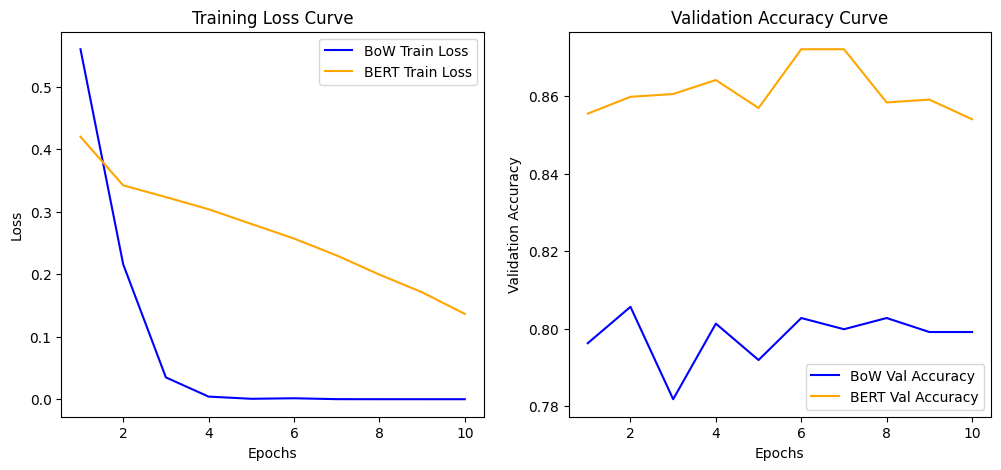

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses_bow, label='BoW Train Loss', color='blue')
plt.plot(epochs_range, train_losses_bert, label='BERT Train Loss', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_accs_bow, label='BoW Val Accuracy', color='blue')
plt.plot(epochs_range, val_accs_bert, label='BERT Val Accuracy', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Curve")
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the best saved models
bow_model.load_state_dict(torch.load("bow_checkpoint.pt"))
bert_model_mlp.load_state_dict(torch.load("bert_checkpoint.pt"))

# Move models to evaluation mode
bow_model.eval()
bert_model_mlp.eval()

# Store true labels and predicted labels for both models
y_true = []
y_pred_bow = []
y_pred_bert = []

with torch.no_grad():
    for test_inputs, test_labels in test_bow_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        # BoW Predictions
        bow_outputs = bow_model(test_inputs)
        _, bow_predicted = torch.max(bow_outputs, 1)


        # Store values
        y_true.extend(test_labels.cpu().numpy())
        y_pred_bow.extend(bow_predicted.cpu().numpy())

with torch.no_grad():

    for test_inputs, test_labels in test_bert_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        # BERT Predictions
        bert_outputs = bert_model_mlp(test_inputs)
        _, bert_predicted = torch.max(bert_outputs, 1)

        # Store values
        y_pred_bert.extend(bert_predicted.cpu().numpy())

# Compute accuracy
bow_test_acc = accuracy_score(y_true, y_pred_bow)
bert_test_acc = accuracy_score(y_true, y_pred_bert)

print(f"BoW Test Accuracy: {bow_test_acc:.4f}")
print(f"BERT Test Accuracy: {bert_test_acc:.4f}")


BoW Test Accuracy: 0.7879
BERT Test Accuracy: 0.8604


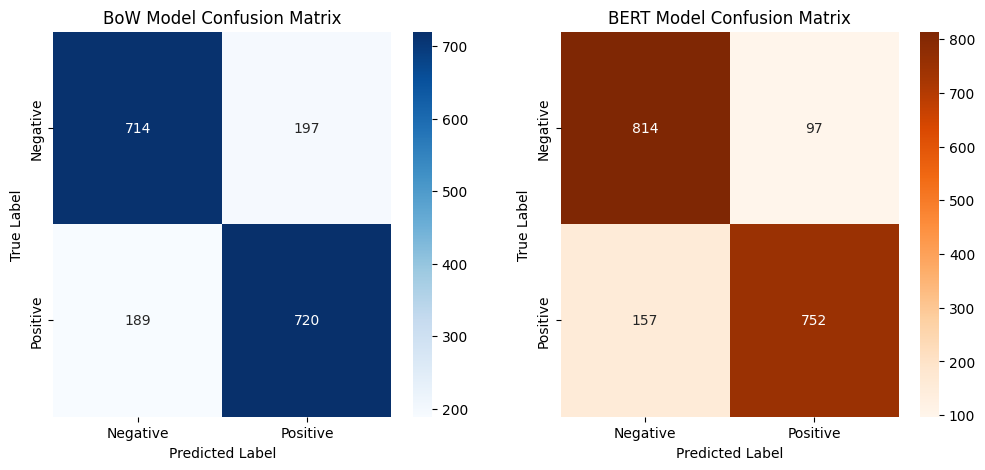

In [ ]:
# Compute confusion matrices
conf_matrix_bow = confusion_matrix(y_true, y_pred_bow)
conf_matrix_bert = confusion_matrix(y_true, y_pred_bert)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# BoW Confusion Matrix
sns.heatmap(conf_matrix_bow, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axes[0])
axes[0].set_title("BoW Model Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# BERT Confusion Matrix
sns.heatmap(conf_matrix_bert, annot=True, fmt="d", cmap="Oranges", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axes[1])
axes[1].set_title("BERT Model Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()


Task 6 below

In [ ]:
# Fit and transform training data
imdb_train_bow = vectorizer.fit_transform(imdb_train_texts).toarray()
imdb_val_bow = vectorizer.transform(imdb_val_texts).toarray()

# Convert to PyTorch tensors
imdb_train_bow_tensor = torch.tensor(imdb_train_bow, dtype=torch.float32)
imdb_val_bow_tensor = torch.tensor(imdb_val_bow, dtype=torch.float32)
imdb_train_labels_tensor = torch.tensor(imdb_train_labels, dtype=torch.long)
imdb_val_labels_tensor = torch.tensor(imdb_val_labels, dtype=torch.long)

# Create TensorDataset for BoW
imdb_train_bow_dataset = TensorDataset(imdb_train_bow_tensor, imdb_train_labels_tensor)
imdb_val_bow_dataset = TensorDataset(imdb_val_bow_tensor, imdb_val_labels_tensor)

# Create DataLoader
batch_size = 8
imdb_train_bow_loader = DataLoader(imdb_train_bow_dataset, batch_size=batch_size, shuffle=True)
imdb_val_bow_loader = DataLoader(imdb_val_bow_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Load the best models
bow_model.load_state_dict(torch.load("bow_checkpoint.pt"))
bert_model_mlp.load_state_dict(torch.load("bert_checkpoint.pt"))

# Move models to device
bow_model.to(device)
bert_model_mlp.to(device)

MLPClassifier(
  (fc_layers): Sequential(
    (0): Linear(in_features=768, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=2, bias=True)
  )
)

In [ ]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_bow = optim.Adam(bow_model.parameters(), lr=0.0001)
optimizer_bert = optim.Adam(bert_model_mlp.parameters(), lr=0.0001)

num_epochs_imdb = 10


# Track metrics
train_losses_bow, val_accs_bow = [], []
train_losses_bert, val_accs_bert = [], []

for epoch in range(num_epochs_imdb):
    # Train BoW model on IMDB
    bow_model.train()
    total_loss_bow = 0
    correct_bow = 0
    total_bow = 0

    for inputs, labels in imdb_train_bow_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_bow.zero_grad()
        outputs = bow_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_bow.step()

        total_loss_bow += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_bow += (predicted == labels).sum().item()
        total_bow += labels.size(0)

    train_acc_bow = correct_bow / total_bow
    train_losses_bow.append(total_loss_bow / len(imdb_train_bow_loader))

    # Train BERT model on IMDB
    bert_model_mlp.train()
    total_loss_bert = 0
    correct_bert = 0
    total_bert = 0

    for inputs, labels in imdb_train_bert_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_bert.zero_grad()
        outputs = bert_model_mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_bert.step()

        total_loss_bert += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_bert += (predicted == labels).sum().item()
        total_bert += labels.size(0)

    train_acc_bert = correct_bert / total_bert
    train_losses_bert.append(total_loss_bert / len(imdb_train_bert_loader))

    # Compute Validation Loss & Accuracy
    bow_model.eval()
    bert_model_mlp.eval()
    val_loss_bow = 0
    val_correct_bow = 0
    val_total_bow = 0
    val_loss_bert = 0
    val_correct_bert = 0
    val_total_bert = 0

    with torch.no_grad():
        for val_inputs, val_labels in imdb_val_bow_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = bow_model(val_inputs)
            loss = criterion(val_outputs, val_labels)
            val_loss_bow += loss.item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_correct_bow += (val_predicted == val_labels).sum().item()
            val_total_bow += val_labels.size(0)

        for val_inputs, val_labels in imdb_val_bert_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = bert_model_mlp(val_inputs)
            loss = criterion(val_outputs, val_labels)
            val_loss_bert += loss.item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_correct_bert += (val_predicted == val_labels).sum().item()
            val_total_bert += val_labels.size(0)

    val_acc_bow = val_correct_bow / val_total_bow
    val_acc_bert = val_correct_bert / val_total_bert

    val_loss_bow /= len(imdb_val_bow_loader)  # Averaging over batches
    val_loss_bert /= len(imdb_val_bert_loader)  # Averaging over batches

    val_accs_bert.append(val_acc_bert)
    val_accs_bow.append(val_acc_bow)

    print(f"Epoch [{epoch+1}/{num_epochs_imdb}] - BoW Train Acc: {train_acc_bow:.4f} | BERT Train Acc: {train_acc_bert:.4f}")
    print(f"  IMDB Val Loss - BoW: {val_loss_bow:.4f} | BERT: {val_loss_bert:.4f}")
    print(f"  IMDB Val Acc - BoW: {val_acc_bow:.4f} | BERT: {val_acc_bert:.4f}")

print("Training on IMDB complete.")

Epoch [1/10] - BoW Train Acc: 0.8268 | BERT Train Acc: 0.5040
  IMDB Val Loss - BoW: 0.2611 | BERT: 0.6946
  IMDB Val Acc - BoW: 0.8950 | BERT: 0.5159
Epoch [2/10] - BoW Train Acc: 0.9169 | BERT Train Acc: 0.5217
  IMDB Val Loss - BoW: 0.2570 | BERT: 0.6932
  IMDB Val Acc - BoW: 0.8945 | BERT: 0.5181
Epoch [3/10] - BoW Train Acc: 0.9453 | BERT Train Acc: 0.5235
  IMDB Val Loss - BoW: 0.3409 | BERT: 0.6933
  IMDB Val Acc - BoW: 0.8843 | BERT: 0.5188
Epoch [4/10] - BoW Train Acc: 0.9796 | BERT Train Acc: 0.5255
  IMDB Val Loss - BoW: 0.4785 | BERT: 0.6930
  IMDB Val Acc - BoW: 0.8773 | BERT: 0.5173
Epoch [5/10] - BoW Train Acc: 0.9937 | BERT Train Acc: 0.5231
  IMDB Val Loss - BoW: 0.6830 | BERT: 0.6934
  IMDB Val Acc - BoW: 0.8728 | BERT: 0.5173


In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses_bow, label='BoW Train Loss', color='blue')
plt.plot(epochs_range, train_losses_bert, label='BERT Train Loss', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve on IMDB")
plt.legend()

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_accs_bow, label='BoW Val Accuracy', color='blue')
plt.plot(epochs_range, val_accs_bert, label='BERT Val Accuracy', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Curve on IMDB")
plt.legend()

plt.show()


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Collect predictions and true labels for validation set
y_true = []
y_pred_bow = []
y_pred_bert = []

bow_model.eval()
bert_model_mlp.eval()

with torch.no_grad():
    for val_inputs, val_labels in imdb_val_bow_loader:
        val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

        # BoW Predictions
        bow_outputs = bow_model(val_inputs)
        _, bow_predicted = torch.max(bow_outputs, 1)

        # Store values
        y_true.extend(val_labels.cpu().numpy())
        y_pred_bow.extend(bow_predicted.cpu().numpy())

with torch.no_grad():
    for val_inputs, val_labels in imdb_val_bert_loader:
        val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

        # BERT Predictions
        bert_outputs = bert_model_mlp(val_inputs)
        _, bert_predicted = torch.max(bert_outputs, 1)

        # Store values
        y_pred_bert.extend(bert_predicted.cpu().numpy())




In [ ]:
# Compute confusion matrices
conf_matrix_bow = confusion_matrix(y_true, y_pred_bow)
conf_matrix_bert = confusion_matrix(y_true, y_pred_bert)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# BoW Confusion Matrix
sns.heatmap(conf_matrix_bow, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axes[0])
axes[0].set_title("BoW Model Confusion Matrix (IMDB Validation)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# BERT Confusion Matrix
sns.heatmap(conf_matrix_bert, annot=True, fmt="d", cmap="Oranges", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axes[1])
axes[1].set_title("BERT Model Confusion Matrix (IMDB Validation)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()